# Pattern Recognition
## Natalia Hoyos
## Assignment 1

## Question 1: Consider two classes described by covariance matrices and zero mean)



### a. For each covariance matrix generate 1000 data samples and plot them on separate figures.

In [35]:
import matplotlib as mplab  #Change document format
import matplotlib.pyplot as plt #to plot
from matplotlib.patches import Ellipse  # to plot contour
from matplotlib.colors import ListedColormap  # To change colors of plots
from matplotlib.patches import Patch  # To modify legend
# from matplotlib.mlab import bivariate_normal

import numpy as np  #To hanlde arrays and do math
import pandas as pd #To use DataFrames

#Import numpy's linear algebra functions (used to modify the normal distributions according to cov matrix and to get the eigenvalues,eigenvectors)
from numpy import linalg as LA  

import seaborn as sns # Plot heatmap

import gzip #open dataset question 3
import urllib  # To download dataset from url

from sklearn.preprocessing import StandardScaler # To standardize the samples

## https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
## from small to large (seaborn-notebook, seaborn-talk, seaborn-poster)
sns.set_style("darkgrid", {"axes.facecolor": '#f0f0fa'})
sns.set_context("talk")
# plt.style.use('seaborn-talk')

#f5f5ff

mplab.rcParams['figure.figsize'] = [15,8]

sns.axes_style()


{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#f0f0fa',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.spines.bottom': True,
 'axes.spines.left': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': 'white',
 'grid.linestyle': '-',
 'image.cmap': 'rocket',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '.15',
 'xtick.bottom': False,
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False}

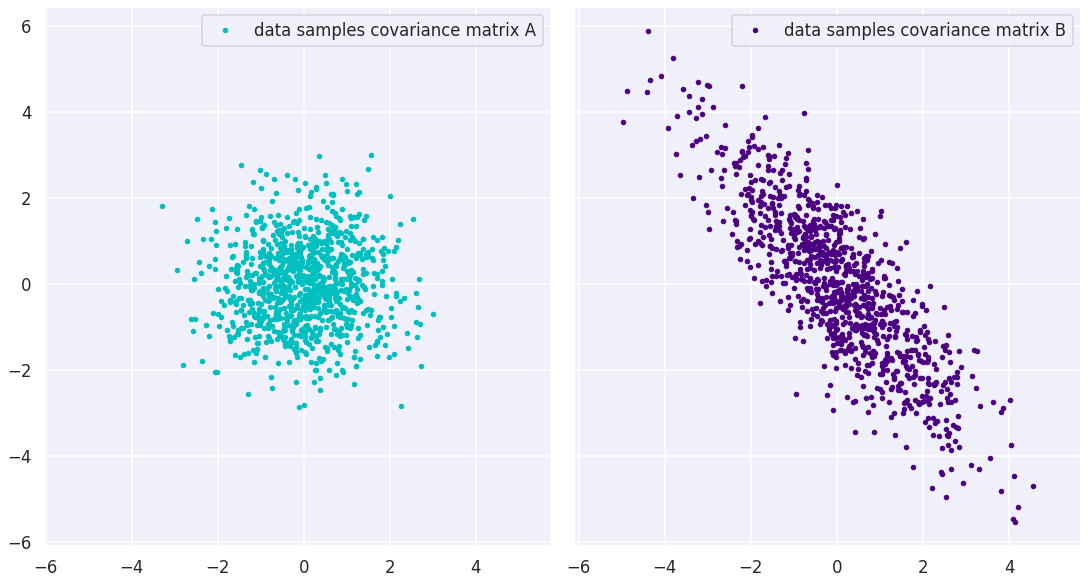

In [36]:
## Datapoints creation
## Inspired in https://stackoverflow.com/questions/14920272/generate-a-data-set-consisting-of-n-100-2-dimensional-samples
mean = (0, 0)

covA_ideal = [[1,0],[0,1]]
covB_ideal = [[2,-2],[-2,3]]

N = 1000

## sample_creation function: creates a normal distribution that then is modified
## by the covariance matrix via choelsky
def sample_creation (mean, cov):
  uncorrelated = np.random.standard_normal((2,N))

  L = LA.cholesky(cov)
  data = np.dot(L,uncorrelated) + np.array(mean).reshape(2,1)

  return data

dataA = sample_creation(mean, covA_ideal)
dataB = sample_creation(mean, covB_ideal)

## Plot samples created
fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True,
                       constrained_layout = True, subplot_kw={'aspect': 'equal'})

ax[0].plot(dataA[0], dataA[1], '.', label = "data samples covariance matrix A", color = 'c')

ax[0].axis('equal')
ax[0].legend()


ax[1].plot(dataB[0], dataB[1], '.', label = "data samples covariance matrix B", color = 'indigo')
ax[1].axis('equal')
ax[1].legend()
plt.show()

# mean = [0,0]

# xa, ya = np.random.multivariate_normal(mean, cova, 1000).T

# fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(xa, ya , ".")
# ax.axis('equal')
# plt.title("Samples from Covariance matrix A")
# plt.show()

### b. For each case calculate first standard deviation contour as a function of the mean, eigenvalues, and eigenvectors. Show your calculation (Hint: consider distribution whitening from the tutorial). You may use preexisting functions for Eigen computation. Plot each contour on the respective plots from part (a).


In [0]:
## Function covariance calculates the covariance matrix 
def covariance_vectors (varX, varY):
  """Computes the covariance between two vectors """
  meanX = np.mean(varX)
  meanY = np.mean(varY)
  sum = 0
  for i in range(varX.size):
    sum = sum + ((varX[i]-meanX)*(varY[i]-meanY))
  cov = sum/(varX.size - 1)
  return cov  

#find the co-variance matrix which is : (A-mean(A) * A^T)/(samples_size - 1)
def covariance_matrix (mat):
  """Computes the covariance of a matrix of features

  Columns are features/variables and rows are observations.  
  Computed as (A-mean(A) * A^T)/(samples_size - 1)
  """

  mean = np.mean(mat, axis = 0) # Each row of the matrix is a feature
  mat_size = mat.shape[0] # Obtain the sample size
  mat = mat - mean# Substract the mean from the matrix
  covariance_matrix = (mat.T.dot(mat)) / (mat_size-1) # Sample mean instead of real mean
  return covariance_matrix

# def calculateCovariance(X):
#   meanX = np.mean(X, axis = 0)
#   lenX = X.shape[0]
#   X = X - meanX
#   covariance = X.T.dot(X)/lenX
#   return covariance

In [0]:
# y = np.array([[1,2,1],[2,3,2],[3,4,3]])
# # A = np.array([[1, 3, 5], [5, 4, 1], [3, 8, 6]])
# print(y)
# print(np.cov(y.T))

# ymean = np.mean(y, axis = 0)
# print(ymean)

# mat = y-ymean
# print(mat)
# print(np.dot(mat.T, mat))
# print(mat.shape)
# print(np.dot(mat.T, mat)/2)
# print(covariance_matrix(y))
# # print(covariance_matrix(A))

# print(covariance_vectors(y[:,0],y[:,1]))
# y[:,0]

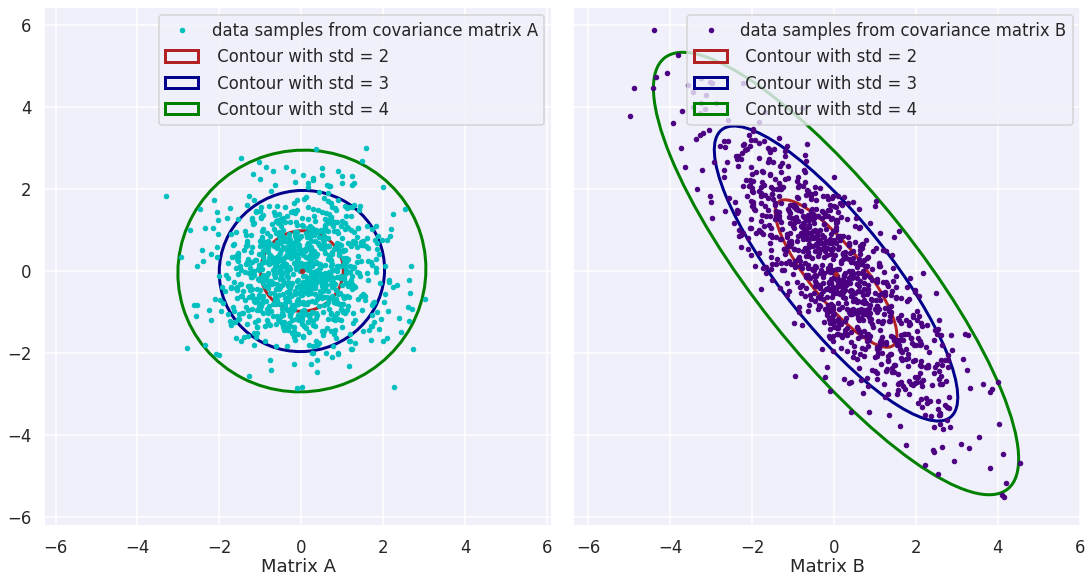

In [39]:
# eigenvalues w and right eigenvectors v. The eigenvectors are the columns of w
# inspired on https://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/


# function dots adds the scatter plot to the ax based on the input data
def dots(ax, data, name, dotsColor = 'c'):
  x = data[0]
  y = data[1]
  ax.plot(x, y , ".", label = "data samples from covariance matrix " + name, color = dotsColor) 
  ax.axis('equal')


# function contour plots the ellipse contour based on the mean an covariance matrix.
# it uses eigenvalues decomposition to obtain the ellipse's  height, width and angle.
def countour(ax, data= None, mean = None, cov = None, colors = None, nums = None, name = None):
  
  if data is not None:
    x = data[0]
    y = data[1]

  if mean is None:
    meanX = np.mean(x)
    meanY = np.mean(y)
  else:
    meanX = mean[0]
    meanY = mean[1]

  if cov is None:
    cov = np.array([[covariance_vectors(x,x),covariance_vectors(x,y)],\
                    [covariance_vectors(y,x),covariance_vectors(y,y)]])

  wh, vh = LA.eigh(cov)

  if nums is None:
    nums = range(1,4)

  if colors == None:
    colors = ("firebrick", "darkblue", "g")

  if name != None:
    name = "Matrix " + name + " "
  else:
    name = " "    

  
  attributes = zip(nums, colors)

  for num, color in attributes:
      
    width = 2*np.sqrt(wh[1])*(num)
    height = 2*np.sqrt(wh[0])*(num)

    angleh = (np.arctan(vh[1][1]/vh[0][1]))*180/np.pi

    ellipse = Ellipse((meanX, meanY), width, height,
                      angle=angleh, linewidth=3,edgecolor = color, 
                      fill=False, zorder=2, label = nums)
    
    ellipse.set(label = name + "Contour with std = " + str(num+1))


  # ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
  ax.plot(meanX, meanY, '.', linewidth = 3, color = colors[0], alpha = 0.9)
  ax.legend()
  return ax


fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True,
                       constrained_layout = True, subplot_kw={'aspect': 'equal'})
dots(ax[0], dataA, "A")
countour(ax[0], dataA)
ax[0].axis('equal')
ax[0].set_title('Matrix A', y = -0.1)

dots(ax[1], dataB, "B", 'indigo')
countour(ax[1], dataB)
ax[1].axis('equal')
ax[1].set_title('Matrix B', y = -0.1)

plt.show()

In [0]:
## ---------- To understand eig and eigh

# covtesting = [[1,5,-2],[5,1,-3],[-2,-3,1]]
# w, v = LA.eig(covtesting)
# wh, vh = LA.eigh(covtesting)

# print("vh", vh)
# print("v", v)

# print(covtesting)

### c. Calculate sample covariance matrices for each class using the data generated in part. Do not use Python functions for computing the covariance.

In [41]:
## Lets calculate the covariance matrices using the python function first
xa = dataA[0]
ya = dataA[1]

xb = dataB[0]
yb = dataB[1]

cova2_test = np.cov(xa,ya)
covb2_test = np.cov(xb,yb)

print("Covariance A with python function: \n", cova2_test)
print("Covariance B with python function: \n", covb2_test)


Covariance A with python function: 
 [[1.01787988 0.01710196]
 [0.01710196 0.96710575]]
Covariance B with python function: 
 [[ 2.20706664 -2.24160181]
 [-2.24160181  3.23907698]]


In [42]:
## Manually get the covariance matrix
cova2 = np.array([[covariance_vectors(xa,xa),covariance_vectors(xa,ya)], \
                  [covariance_vectors(ya,xa),covariance_vectors(ya,ya)]])
print("Covariance A: \n",cova2)

covb2 = np.array([[covariance_vectors(xb,xb),covariance_vectors(xb,yb)], \
                  [covariance_vectors(yb,xb),covariance_vectors(yb,yb)]])
print("Covariance B: \n",covb2)

Covariance A: 
 [[1.01787988 0.01710196]
 [0.01710196 0.96710575]]
Covariance B: 
 [[ 2.20706664 -2.24160181]
 [-2.24160181  3.23907698]]


In [43]:
xx = np.array([xa,ya])
cova3 = covariance_matrix(xx)
print("Covariance A: \n",cova3)

Covariance A: 
 [[ 8.72859889e-01  1.38145015e-01  6.17311586e-02 ...  2.42427825e+00
   5.27605759e-01 -2.24913141e-01]
 [ 1.38145015e-01  2.18638128e-02  9.77001230e-03 ...  3.83683521e-01
   8.35026406e-02 -3.55963537e-02]
 [ 6.17311586e-02  9.77001230e-03  4.36580486e-03 ...  1.71451921e-01
   3.73137948e-02 -1.59065034e-02]
 ...
 [ 2.42427825e+00  3.83683521e-01  1.71451921e-01 ...  6.73318260e+00
   1.46537054e+00 -6.24673035e-01]
 [ 5.27605759e-01  8.35026406e-02  3.73137948e-02 ...  1.46537054e+00
   3.18914685e-01 -1.35950191e-01]
 [-2.24913141e-01 -3.55963537e-02 -1.59065034e-02 ... -6.24673035e-01
  -1.35950191e-01  5.79542281e-02]]


### d. Explain the difference between the given covariance matrix for each class and the corresponding sample covariance matrix generated in (b). In which condition they can be the same?


## Question 2. Consider a 2D problem with 3 classes where each class is described by priors, mean vectors, and covariance matrices.


### a) Create a program to plot the decision boundaries for a ML and MAP classifier. Plot the means and first standard deviation contours for each class. Discuss the differences between the decision boundaries.

MAP Classifier

In [0]:
## Based on https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
## Based on http://www.nada.kth.se/~stefanc/DATORSEENDE_AK/l5.pdf

PC1 = 0.2
meanC1 = np.array([3, 2]).T
covC1 = np.array([[1, -1],[-1, 2]])

PC2 = 0.7
meanC2 = np.array([5, 4]).T
covC2 = [[1, -1], [-1, 2]]

PC3 = 0.1
meanC3 = np.array([2, 5]).T
covC3 = [[0.5, 0.5], [0.5, 3]]

In [0]:
## Based on https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
## Based on http://www.nada.kth.se/~stefanc/DATORSEENDE_AK/l5.pdf

def discriminantClass(coordinate, prob = PC1, mean = meanC1, cov = covC1, ML = False):
  if ML == True:
    prob = 1/3
  coordinate = np.array(coordinate)
  cov_inverse = LA.inv(cov)
  W_i = -0.5 * cov_inverse
  w_i = cov_inverse @ mean
  w_i_0 = -0.5 * mean.T @ cov_inverse @ mean - 0.5 * np.log(LA.det(cov)) + np.log(prob)
  result = coordinate.T @ W_i @ coordinate + w_i.T @ coordinate + w_i_0
  return result

In [46]:
print(discriminantClass([2,5]))
print(discriminantClass([2,5]))
print(discriminantClass([2,5]))

-4.1094379124341
-4.1094379124341
-4.1094379124341


In [0]:
def discriminate (coordinate1, coordinate2, ML = False):
  C1 = discriminantClass([coordinate1, coordinate2], PC1, meanC1, covC1, ML)
  C2 = discriminantClass([coordinate1, coordinate2], PC2, meanC2, covC2, ML)
  C3 = discriminantClass([coordinate1, coordinate2], PC3, meanC3, covC3, ML)

  if ((C1 >= C2) and (C1 >= C3)):
    classification = 1
  elif ((C2 >= C1) and (C2 >= C3)):
    classification = 2
  elif ((C3 >= C2) and (C3 >= C1)):
    classification = 3
  return classification


In [0]:
## Based on https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# Plot of the decision boundary. Each point in the mesh has a color based on its class
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = -5, 10.1
y_min, y_max = -5, 15.1
h = 0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]

discriminateGridML = np.zeros((Z.shape[0], 1))
discriminateGridMAP = np.zeros((Z.shape[0], 1))

for i in range(Z.shape[0]):
  discriminateGridMAP[i] = discriminate(Z[i,0], Z[i,1])
  discriminateGridML[i] = discriminate(Z[i,0], Z[i,1], True)

cmap_colors = ['indigo', 'purple', 'paleturquoise']
cmap = ListedColormap(cmap_colors)

discriminateGridMAP = discriminateGridMAP.reshape(xx.shape)

discriminateGridML = discriminateGridML.reshape(xx.shape)


<Figure size 1080x576 with 0 Axes>

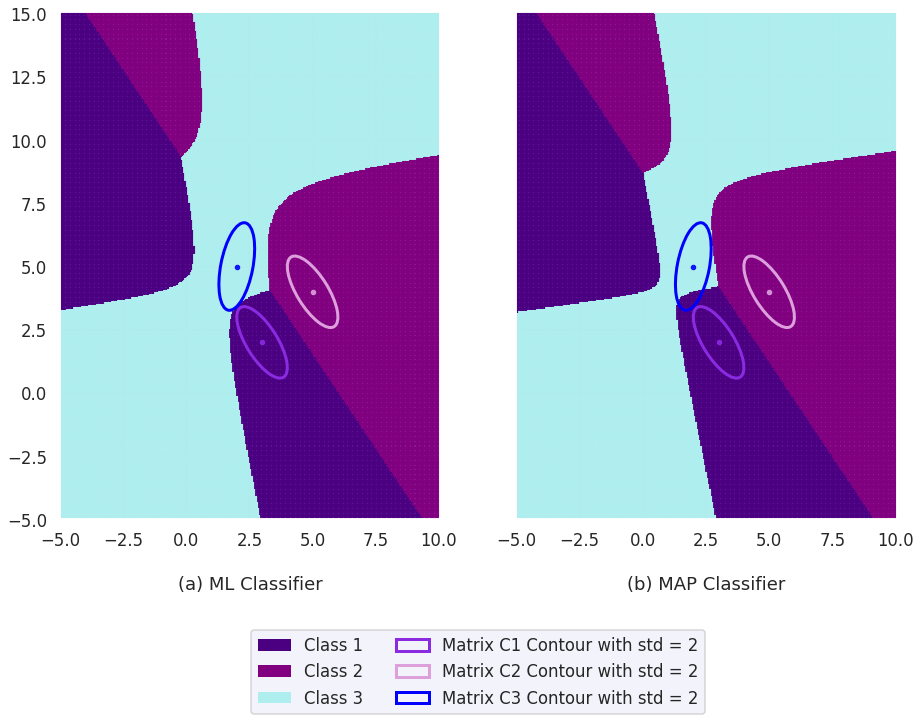

In [49]:
plt.figure()

fig, ax = plt.subplots(figsize=(15,15),nrows = 1,ncols = 2, sharey = True, subplot_kw = {'aspect': 'equal'})

countour(ax[0], data = None, mean = meanC1, cov = covC1, colors = ['blueviolet'], nums = [1], name = 'C1')
countour(ax[0], data = None, mean = meanC2, cov = covC2, colors = ['plum'], nums = [1], name = 'C2')
countour(ax[0], data = None, mean = meanC3, cov = covC3, colors = ['b'], nums = [1], name = 'C3')


ax[0].pcolormesh(xx, yy, discriminateGridML, cmap=cmap, alpha = 0.9)
ax[0].grid(True, color = 'thistle')
ax[0].set_title('(a) ML Classifier', y = -0.15)
ax[0].get_legend().remove()


countour(ax[1], data = None, mean = meanC1, cov = covC1, colors = ['blueviolet'], nums = [1], name = 'C1')
countour(ax[1], data = None, mean = meanC2, cov = covC2, colors = ['plum'], nums = [1], name = 'C2')
countour(ax[1], data = None, mean = meanC3, cov = covC3, colors = ['b'], nums = [1], name = 'C3')

# legendHandles, labels = ax[0].get_legend_handles_labels()
# legendHandles.insert(0, Patch(facecolor = cmap_colors[0], edgecolor = 'None',
#                      label = "Class 1"))
# legendHandles.insert(1, Patch(facecolor = cmap_colors[1], edgecolor = 'None',
#                      label = "Class 2"))
# legendHandles.insert(2, Patch(facecolor = cmap_colors[2], edgecolor = 'None',
#                      label = "Class 3"))

## Set the legend
# ax[0].legend(handles = legendHandles, ncol = 2, loc = 3)

# # ax.pcolormesh(xx, yy, discriminateGrid, cmap=plt.get_cmap('Set1'))
ax[1].pcolormesh(xx, yy, discriminateGridMAP, cmap=cmap, alpha = 0.9)
ax[1].grid(True, color = 'thistle')
ax[1].set_title('(b) MAP Classifier', y = -0.15)


legendHandles, labels = ax[1].get_legend_handles_labels()
legendHandles.insert(0, Patch(facecolor = cmap_colors[0], edgecolor = 'None',
                     label = "Class 1"))
legendHandles.insert(1, Patch(facecolor = cmap_colors[1], edgecolor = 'None',
                     label = "Class 2"))
legendHandles.insert(2, Patch(facecolor = cmap_colors[2], edgecolor = 'None',
                     label = "Class 3"))

## Set the legend
# ax[1].legend(handles = legendHandles, ncol = 2, loc = 3)
ax[1].legend(handles = legendHandles, ncol = 2, loc = 8, bbox_to_anchor = (-0.1, -0.4))

ML Classifier

### b) Generate a 3000 sample dataset using the prior probabilities of each class. For both the ML and MAP classifiers: classify the generated dataset, calculate a confusion matrix, and calculate the experimental P(ε). Discuss the results.


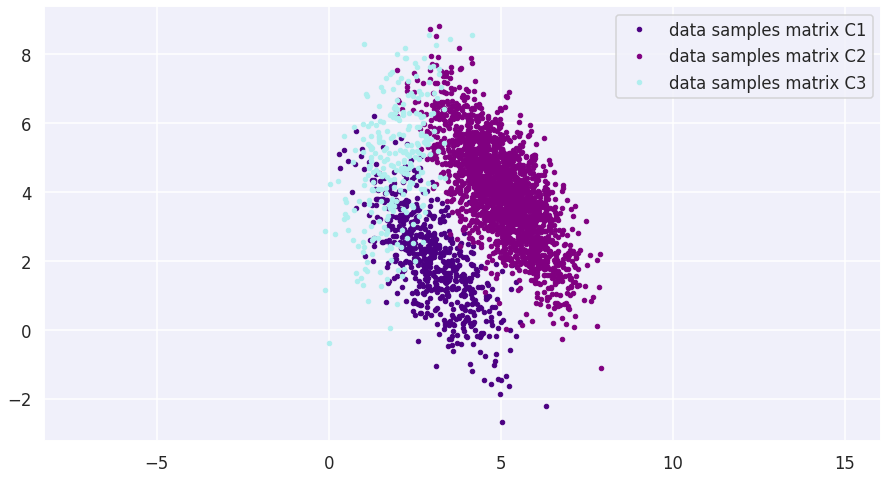

In [50]:
## Create the datapoints

N = 3000

# Create samples from a normal distribution
uncorrelated = np.random.standard_normal((2,N))

# Pick samples from a random uniform distribution
ran = pd.DataFrame(np.random.uniform(size = 3000))
filtering = pd.concat([pd.DataFrame(uncorrelated.T),ran] , ignore_index=True, axis = 1)

# split the dataset into classes
filteredC1 = filtering[filtering[2]<=0.2].iloc[:,:-1].to_numpy().T
filteredC2 = filtering[(0.2 < filtering[2]) & (filtering[2]<=0.9)].iloc[:,:-1].to_numpy().T
filteredC3 = filtering[filtering[2]>0.9].iloc[:,:-1].to_numpy().T

# Modify the normal distribution according to each class's mean and covariacne matrix 
LC1 = LA.cholesky(covC1)
LC2 = LA.cholesky(covC2)
LC3 = LA.cholesky(covC3)

dataC1 = np.dot(LC1,filteredC1) + np.array(meanC1).reshape(2,1)
dataC2 = np.dot(LC2,filteredC2) + np.array(meanC2).reshape(2,1)
dataC3 = np.dot(LC3,filteredC3) + np.array(meanC3).reshape(2,1)


# Plot the samples
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
ax.plot(dataC1[0], dataC1[1], '.', label = "data samples matrix C1", color = cmap_colors[0])
ax.plot(dataC2[0], dataC2[1], '.', label = "data samples matrix C2", color = cmap_colors[1])
ax.plot(dataC3[0], dataC3[1], '.', label = "data samples matrix C3", color = cmap_colors[2])
ax.axis('equal')
ax.legend()
plt.show()

In [0]:
data2 = np.c_[dataC1, dataC2, dataC3]
data2 = data2.T

## Create ClassificationMatrix. 
# First Column: Real classification
# Second Column: MAP
# Third Column: ML
classificationMatrix = np.zeros((data2.shape[0], 3))
classificationMatrix[0:(dataC1.shape[1]),0]=1
classificationMatrix[(dataC1.shape[1]):(dataC1.shape[1]+dataC2.shape[1]),0]=2
classificationMatrix[(dataC1.shape[1]+dataC2.shape[1]):(dataC1.shape[1]+dataC2.shape[1]+dataC3.shape[1]),0]=3
classificationMatrix[2999,0]
for i in range(data2.shape[0]):
  classificationMatrix[i,1] = discriminate(data2[i,0], data2[i,1])  # Populate classificationMatrix with MAP results
  classificationMatrix[i,2] = discriminate(data2[i,0], data2[i,1], True)  # Populate classificationMatrix with ML results


## Confusion Matrix
##               Real
##              1     2      3 
## Predicted 1 T1     F1     F1
## Predicted 2 F2     T2     F2
## Predicted 3 F3     F3     T3
def populateConfusionMatrix(confusionMatrix, method):

  if method.upper() == "ML":
    column = 2
  elif method.upper() == "MAP":
    column = 1

  experimentalError = 0
  for i in range(3):
    j=i+1
    for k in range(3):
      l = k+1
      confusionMatrix[i,k] = classificationMatrix[classificationMatrix[:,column]==j][classificationMatrix[classificationMatrix[:,column]==j][:,0]==l].shape[0]
      if i != k:
        experimentalError = experimentalError + confusionMatrix[i,k]
  
  experimentalError = experimentalError/classificationMatrix.shape[0]
  
  return confusionMatrix, experimentalError


confusionMatrixMAP = np.zeros((3, 3))

confusionMatrixML = np.zeros((3, 3))

confusionMatrixMAP, experimentalErrorMAP = populateConfusionMatrix(confusionMatrixMAP, 'MAP')

confusionMatrixML, experimentalErrorML = populateConfusionMatrix(confusionMatrixML, 'ML')

In [0]:
# classificationMatrix
# dataC3.shape
# # classificationMatrix[classificationMatrix[:,0]==0]

0.08766666666666667

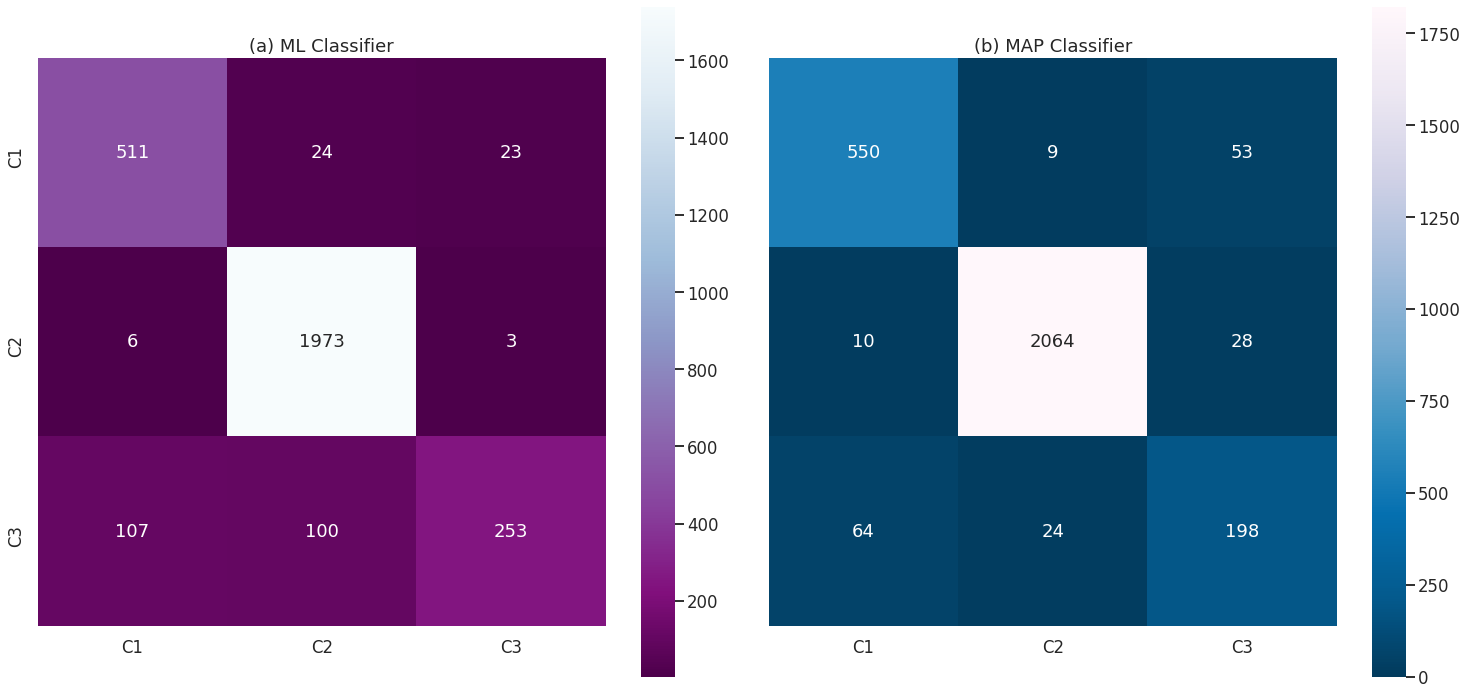

In [53]:
confusionMatrixML = pd.DataFrame(confusionMatrixML, index = ["C1", "C2", "C3"],
                  columns = ["C1", "C2", "C3"])

confusionMatrixMAP = pd.DataFrame(confusionMatrixMAP, index = ["C1", "C2", "C3"],
                  columns = ["C1", "C2", "C3"])


fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True, figsize = [21.0, 10.0])

# ax[0] = sns.heatmap(confusionMatrixML, annot = True, fmt = 'g', cbar = True, ax = ax[0], square = True, cmap="BuPu", vmin = 5, vmax = 660, center = 150, robust = True)
ax[0] = sns.heatmap(confusionMatrixML, annot = True, fmt = 'g', cbar = True, ax = ax[0], square = True, cmap="BuPu_r",  robust = True)
ax[0].set_title('(a) ML Classifier')

ax[1].set_title('(b) MAP Classifier')

# ax[1] = sns.heatmap(confusionMatrixMAP, annot = True, fmt = 'g', cbar = True, ax = ax[1], square = True, cmap="PuBu", vmin = 5, vmax = 660, center = 150, robust = True) #"RdYlGn" cubehelix
ax[1] = sns.heatmap(confusionMatrixMAP, annot = True, fmt = 'g', cbar = True, ax = ax[1], square = True, cmap="PuBu_r", vmin = 0,center = 900, robust = True) #"RdYlGn" cubehelix
fig.tight_layout()
experimentalErrorML

It is expected for the ML to have higher error since it assumes equal priors.

## Question 3. The MNIST dataset contains a set of images containing the digits 0 to 9. Each image in the data set is a 28x28 image. The data is divided into two sets of images: a training set and a testing set. The MNIST dataset can be downloaded from http://yann.lecun.com/exdb/mnist/. The training set is used in this exercise. 


### a) Program PCA that takes X(DxN) and returns Y(dxN) where N is the number of samples, D is the number of input features, and d is the numberof features selected by the PCA algorithm.
https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f


In [0]:
import matplotlib as mplab  #Change document format
import matplotlib.pyplot as plt #to plot
from matplotlib.patches import Ellipse  # to plot contour
from matplotlib.colors import ListedColormap  # To change colors of plots
from matplotlib.patches import Patch  # To modify legend
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
# from matplotlib.mlab import bivariate_normal

import numpy as np  #To hanlde arrays and do math
import pandas as pd #To use DataFrames

#Import numpy's linear algebra functions (used to modify the normal distributions according to cov matrix and to get the eigenvalues,eigenvectors)
from numpy import linalg as LA  

import seaborn as sns # Plot heatmap

import gzip #open dataset question 3
import urllib  # To download dataset from url

from sklearn.preprocessing import StandardScaler # To standardize the samples





## https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
## from small to large (seaborn-notebook, seaborn-talk, seaborn-poster)
sns.set_style("darkgrid", {"axes.facecolor": '#f0f0fa'})
sns.set_context("talk")
# plt.style.use('seaborn-talk')

#f5f5ff

mplab.rcParams['figure.figsize'] = [15,8]

# sns.axes_style()

In [0]:
# https://stackoverflow.com/a/53570674
# To read file

# MNIST = gzip.open('train-images-idx3-ubyte.gz','r')
# f = gzip.open('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz','r')

try:

  # print("getting file from the internet")
  mnist = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
  MNIST = gzip.open(mnist,'r')

except:
  # print("Failed to find file, attempting to get training file locally")
  MNIST = gzip.open('train-images-idx3-ubyte.gz','r')

# else:
  # print("File found on the internet")


image_size = 28
num_features = 28*28
num_images = 60000


MNIST.read(16)
buffer = MNIST.read(image_size * image_size * num_images)
data = np.frombuffer(buffer, dtype=np.uint8).astype(np.float32)
data_img = data.reshape(num_images, image_size, image_size)

## to show image:
# image = np.asarray(data[59000])
# plt.imshow(image)
# plt.show()


# reshape it into vector of num_images by 784: 1 pixel per row
data_table = data.reshape(num_images, num_features) 
# plt.imshow(data_table[504,:].reshape(image_size,image_size))

# Defining a covariance matrix
def covariance_matrix (mat):
  """Computes the covariance of a matrix of features

  Columns are features/variables and rows are observations.  
  Computed as (A-mean(A) * A^T)/(samples_size - 1)
  """

  mean = np.mean(mat, axis = 0) # Each row of the matrix is a feature
  mat_size = mat.shape[0] # Obtain the sample size
  mat = mat - mean# Substract the mean from the matrix
  covariance_matrix = (mat.T.dot(mat)) / (mat_size-1) # Sample mean instead of real mean
  return covariance_matrix


def covariance_matrix_rows (mat):
  """Computes the covariance of a matrix of features

  Columns are observations and rows are features/variables.  
  Computed as (A-mean(A) * A^T)/(samples_size - 1)
  """

  mean = np.mean(mat, axis = 1) # Each column of the matrix is a feature
  mat_size = mat.shape[1] # Obtain the sample size
  mat = (mat.T - mean).T# Substract the mean from the matrix
  covariance_matrix = (mat @ mat.T) / (mat_size-1) # Sample mean instead of real mean
  return covariance_matrix


In [0]:
# cov_matrix = covariance_matrix(np.array(standardized_data))
# data_table.shape

In [0]:
# y = np.array([[1,2,1],[2,3,2],[3,4,3]])
# # A = np.array([[1, 3, 5], [5, 4, 1], [3, 8, 6]])
# print(y)
# print(np.cov(y.T))

# ymean = np.mean(y, axis = 0)
# # print(ymean)

# mat = y-ymean
# # print(mat)
# # print(np.dot(mat.T, mat))
# # print(mat.shape)
# # print(np.dot(mat.T, mat)/2)
# print(covariance_matrix_rows(y.T))
# # print(covariance_matrix(A))

# print(covariance_vectors(y[:,0],y[:,1]))
# y[:,0]

In [0]:
## --- Create function to perform PCA based on an input matrix and the number of dimensions to keep---

# Based on https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
## Input has variables as rows and features as columns
def PCA(mat, d):
  """Performs PCA (dimensionality reduction) to a matrix with the features as columns

  Parameters: 
  mat: matrix of samples with features as columns
  d: number of dimensions (eigenvectors) to use for the projection

  Returns: 
  mat_mod: modified matrix using PCA
  eigen_vecs_PCA: The eigenvectors used for the projection

  """
  # Standardize the sample
  mat_std = StandardScaler().fit_transform(mat)

  # Get the covariance
  mat_cov = covariance_matrix(mat_std)

  # eigendecomposition of covariance matrix
  eigen_vals, eigen_vecs = LA.eigh(mat_cov)
  eigen_vecs_PCA = eigen_vecs[:,-d:]

  # Project the data to the number of desired features (d)
  mat_mod = eigen_vecs_PCA.T @ mat_std.T
  return mat_mod, eigen_vecs_PCA

In [0]:
# Based on https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/
def PCA_rows(mat, d):
  """Performs PCA (dimensionality reduction) to a matrix with the features as rows

    Parameters: 
    mat: matrix of samples with features as rows
    d: number of dimensions (eigenvectors) to use for the projection

    Returns: 
    mat_mod: modified matrix using PCA
    eigen_vecs_PCA: The eigenvectors used for the projection
  
   """
  # Standardize the sample
  mat_std = StandardScaler().fit_transform(mat.T)

  # Get the covariance
  mat_cov = covariance_matrix(mat_std)

  # eigendecomposition of covariance matrix
  eigen_vals, eigen_vecs = LA.eigh(mat_cov)
  eigen_vecs_PCA = eigen_vecs[:,-d:]

  # Project the data to the number of desired features (d)
  mat_mod = eigen_vecs_PCA.T @ mat_std.T
  return mat_mod, eigen_vecs_PCA

In [0]:
# mat_PCA, eigen_vecs_PCA = PCA_rows(data_table.T, d = 10)
# mat_PCA, eigen_vecs_PCA = PCA(data_table, d = 10)

Visualizing the projection on the first two componentss of PCA:

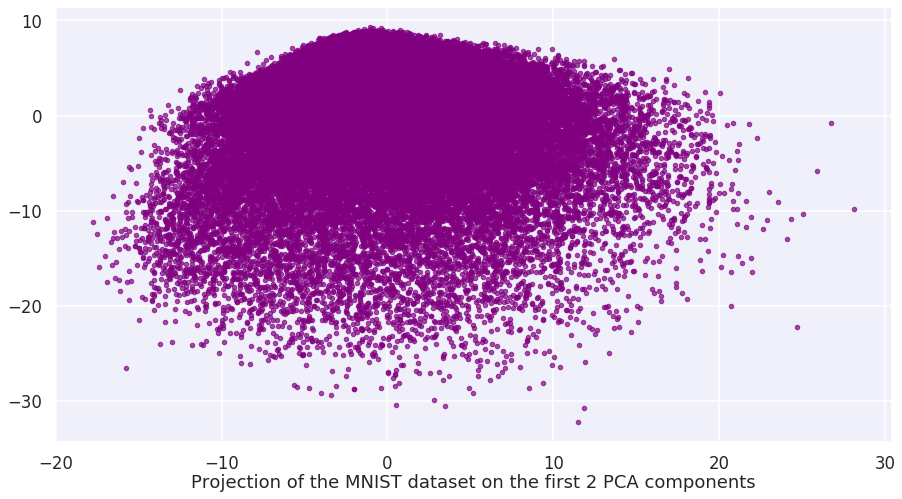

In [61]:
#Perform PCA and plot the projection on the first 2 components
mat_PCA, eigen_vecs_PCA = PCA(data_table, d = 2)

# plot
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(mat_PCA[0, :], mat_PCA[1, :], ".", color = "purple", alpha = 0.7)
ax.set_title("Projection of the MNIST dataset on the first 2 PCA components", y = -0.12)
plt.show()

### b) Propose a suitable d using proportion of variance (POV) =95%.

In [0]:

# def explainedVariance(eigenvals, y = 20, annotationPeriod = 15):
#   eigenvals_sum = sum(eigenvals) #Total sum of the eigenvalues. 
#   var_exp = [(i / eigenvals_sum) * 100 for i in sorted(eigenvals, reverse=True)] #Explained variance for each eigenvector direction
#   var_exp_cum = np.cumsum(var_exp) #Cumulative explained variance

#   x=['EV %s' %i for i in range(1,len(var_exp))] #Create the x ticks labels for the plot

  
#   x = x[0:y]
#   var_exp = var_exp[0:y]
#   var_exp_cum = var_exp_cum[0:y]
#   max_percentage = int(np.max(var_exp_cum)/10) #Calculate the max percentage to display (for the plot scaling)

#   y_pos = np.arange(len(x)) #Obtain the number of elements in the plots
#   # plt.figure(figsize = (15,15))
#   plt.bar(y_pos, var_exp, align = 'center', alpha = 0.5, label = "Percentage of the components' total variance") #Graph the bar chart
#   plt.plot(y_pos, var_exp_cum, '-o', label='Cumulative explained variance') #Plot the cumulative variance
#   plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 'x-large') #Plot the legend outside of the plot
#   for i in range(len(x)):
#     if i % annotationPeriod == 0:
#         plt.annotate(round(var_exp_cum[i],2), xy = (i,var_exp_cum[i] - 3), fontsize = 'large') #Annotate the (rounded) cumulative explained variance under each value
#   for i in range(max_percentage):
#       plt.axhline(y = 10 * (i + 1), alpha = 0.1, color = 'black') #Graph horizontal lines for easier viewing
#   plt.xticks(y_pos, x, fontsize='large') #Plot the x ticks
#   plt.yticks(fontsize = 'large')
#   plt.ylabel('Percentage', fontsize = 'large') #Plot the y label
#   plt.title('Percentage of variance each component adds', fontsize = 'large') #Add a title to the graph
#   plt.show() #Display the graph

In [0]:
#Inspired in https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

def explainedVariance(eigenvals, component_POV = 20, annotationPeriod = 10, POV = None):
  """ Calculate and plot the explained variance
    Parameters: 
    eigenvals: eigenvalues
     
  
    Returns: 
    int: Description of return value """
  # The annotation period is how often the annotations should be marked
  # The desired POV is for creating an horizontal line at the desired Proportion of Variance (0 - 1)

  component_POV = component_POV +11
  eigenvals_tot = sum(eigenvals) #Obtain the total of the eigenvalues
  var_exp = [(i / eigenvals_tot) * 100 for i in sorted(eigenvals, reverse=True)] #Obtain the 'variance each component explains' 
  cum_var_exp = np.cumsum(var_exp) #Obtain the cumulative variance

  x=['EV %s' %i for i in range(1, len(var_exp))] #Create the x ticks labels for the plot

  #Choose the first y eigenvalues:
  x = x[0:component_POV]
  var_exp = var_exp[0:component_POV]
  cum_var_exp = cum_var_exp[0:component_POV]
  max_percentage = int(np.max(cum_var_exp)/10) #Calculate the max percentage to display (for the plot scaling)


  y_pos = np.arange(len(x)) #Obtain the number of elements in the plots
  fig, ax = plt.subplots()
  ax.plot(y_pos, cum_var_exp, '-o', label='Cumulative explained variance', color = 'purple', alpha = 0.2) #Plot the cumulative variance


  for i in range(len(x)):
    if i % annotationPeriod == 0:
        ax.annotate(round(cum_var_exp[i], 2), xy = (i, cum_var_exp[i] - 3)) #Annotate the (rounded) cumulative explained variance under each value

  #Graph horizontal lines
  for i in range(max_percentage):
      ax.axhline(y = 10 * (i + 1), alpha = 0.1, color = 'magenta') 

  # Add guide line at the desired Proportion of Variance (POV)
  if POV is not None: 
    ax.axhline(POV * 100, alpha = 0.7, color = 'indigo', linewidth = 3, label = "desired POV = "+ str(POV) + " %")
    ax.text(x = 10, y = POV * 100 + 0.2, s = "POV = {0:.0f}%".format(POV * 100), alpha = 0.9, color = 'indigo')

  # plt.xticks(y_pos, x, fontsize='large') #Plot the x ticks
  ax.xaxis.set_major_locator(MultipleLocator(annotationPeriod))
  # ax.yticks(fontsize = 'large')
  # plt.ylabel('Percentage of Explained Variance', fontsize = 'large') #Plot the y label
  # plt.xlabel('Number of Features', fontsize = 'large') #Plot the y label
  ax.set_ylabel('Explained Variance')
  ax.set_xlabel('Number of Features')
  ax.legend(loc = 4)
  ax.set_title('Cummulative Explained Variance',  y = -0.13) #Add a title to the graph
  plt.show() #Display the graph

In [64]:
##--- Compute the number of componeents necessary to have a 95% explained variance (proportion of variance)---
# Standardize the data
data_table_std = StandardScaler().fit_transform(data_table)

# Get the covariance
mat_std_cov = covariance_matrix(data_table_std)

# Get the eigenvalues
eigen_vals, eigen_vecs = LA.eigh(mat_std_cov)

# Sort the eigenvalues
eigen_vals = sorted(eigen_vals, reverse=True)

# Calculate the total eigenvalue value
eigen_vals_tot = sum(eigen_vals)
explained_var = 0
component_POV = -1
# Iterate over the cumulative sum of the eigenvalues until they
# explain at least 95% of the variance
while ((explained_var < 95) and (component_POV < 784)):
  component_POV = component_POV + 1
  var_exp = eigen_vals[component_POV] / eigen_vals_tot * 100
  explained_var = explained_var + var_exp
  
print("The number of features required to conserve 95% of the POV is:", component_POV + 1)

The number of features required to conserve 95% of the POV is: 331


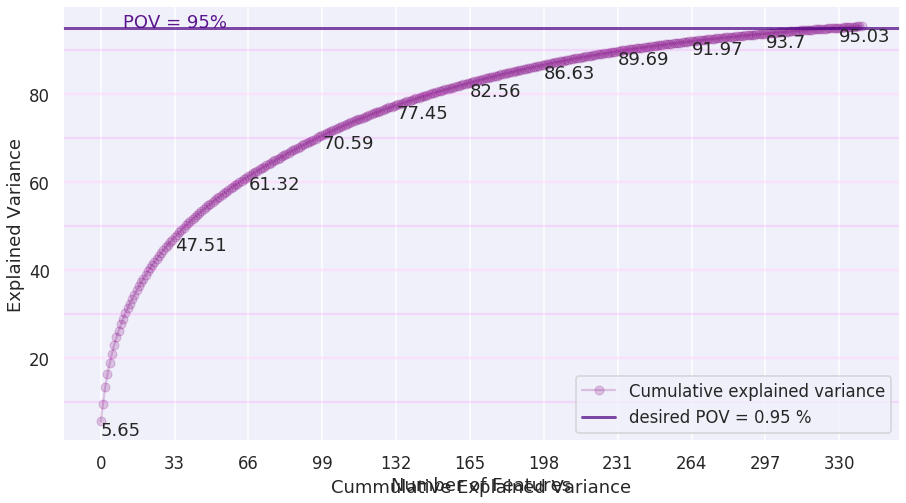

In [65]:
explainedVariance(eigen_vals, component_POV , annotationPeriod = round(component_POV/10), POV = 0.95)


### c) Program PCA reconstruction that takes 𝑌𝑃𝐶𝐴(dxN) and returns 𝑋 ̂(DxN) (i.e., a reconstructed image). For different values of d= {1, 20, 40, 60, 80, …, 760, 784} reconstruct all samples and calculate the average mean square error (MSE). Plot MSE (y-axis) versus d (x-axis). Discuss the results.

In order to return to the original matrix, it is possible to use the eigenVectors array and apply it to the projected matrix, such that $\hat{\mathbf{x}} = ZV^T = XVV^T$. A function can be constructed to perform this operation, as such:

In [0]:
## --- PCA reconstruction ---
# Inspired in https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com
def undo_PCA(mat_projected, eigen_vec):
  mat = mat_projected.T @ eigen_vec.T
  return mat.T

def MSECalc(mat, featureNum):
  # mat_std = StandardScaler().fit_transform(mat)
  mat_PCA, eigen_vecs_PCA = PCA_rows(mat, d = featureNum)
  mat_undo_PCA = undo_PCA(mat_PCA, eigen_vecs_PCA)
  MSE = (np.square(np.subtract(mat, mat_undo_PCA))).mean()
  return MSE

In [0]:
features = [i for i in range(20,761,20)]
features.insert(0, 1)
features.append(784)
MSE = np.ones(len(features))

std_data_table_form = StandardScaler().fit_transform(data_table)

for val in features:
  i = round((val-1) / 20) 
  MSE[i] = MSECalc(std_data_table_form.T, val)

In [0]:
# std_data_table_form = StandardScaler().fit_transform(data_table)

# mat_PCA, eigen_vecs_PCA = PCA_rows(data_table.T, d = 10)
# mat_undo_PCA = undo_PCA(mat_PCA, eigen_vecs_PCA)
# std_data_table_form.shape
# print(mat_undo_PCA.shape)
# MSE = (np.square(np.subtract(std_data_table_form.T, mat_undo_PCA))).mean()
# MSE

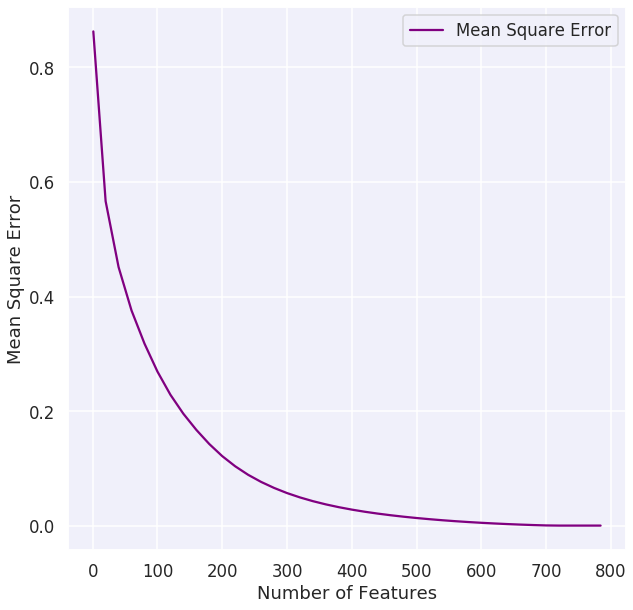

In [69]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(features, MSE, label = "Mean Square Error", color = "purple")
ax.set_ylabel('Mean Square Error')
ax.set_xlabel('Number of Features')
ax.legend()
plt.show()

### d) Reconstruct a sample from the class of number ‘8’ and show it as a ‘png’ image for d={1, 10, 50, 250, 784}. Discuss the results.


In [0]:
# ####### Original
# # from matplotlib.gridspec import GridSpec
# d = [1, 10, 50, 250, 784]
# scaler = StandardScaler()
# data_table_std = StandardScaler().fit_transform(data_table)

# ax = []
# fig = plt.figure(figsize = [12.0, 8.0])
# gs = GridSpec(2, 3, hspace = 0.2, figure = fig)
# ax.insert(0, fig.add_subplot(gs[0, 0]))
# ax.insert(1, fig.add_subplot(gs[0, 1]))
# ax.insert(2, fig.add_subplot(gs[0, 2]))
# ax.insert(3, fig.add_subplot(gs[1, 0]))
# ax.insert(4, fig.add_subplot(gs[1, 1]))
# ax.insert(5, fig.add_subplot(gs[1, 2]))

# #Add titles
# for feat, letter, num in zip(d, ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"], range(6)):
#   matPCA, eigenVecsPCA = PCA(data_table_std.T, d = feat)
#   mat_undo_PCA = undo_PCA(matPCA, eigenVecsPCA).T
#   mat_undo_PCA = scaler.inverse_transform(mat_undo_PCA) # We also need to scale it back to make it more presentable
#   matImg = mat_undo_PCA.reshape(num_images, image_size, image_size)
#   ax[num].set_title(letter + " Feature = " + str(feat), y = -0.1)
#   image = np.asarray(matImg[17])
#   ax[num].imshow(image)
#   disableTicksGrids(ax[num])
# plt.show()

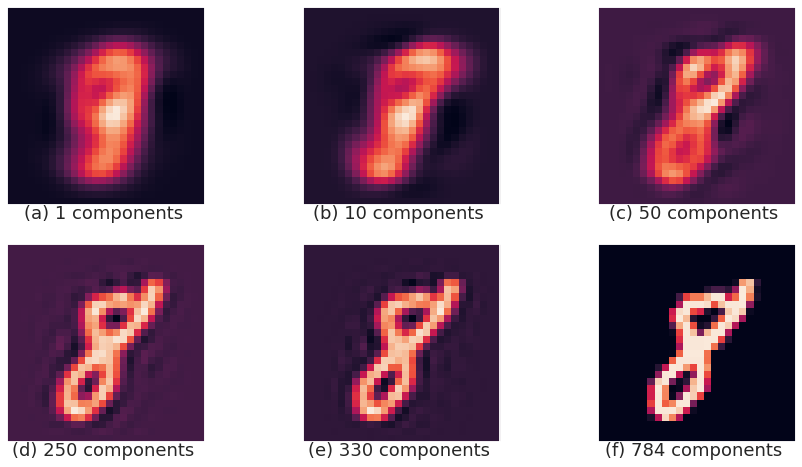

In [71]:
# https://www.tutorialspoint.com/matplotlib/matplotlib_subplots_function.htm
# https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html

d = [1, 10, 50, 250, component_POV, 784]
scaler = StandardScaler()
data_table_std = scaler.fit_transform(data_table)

# ax = []
fig, ax = plt.subplots(2,3)
# gs = GridSpec(2, 3, hspace = 0.2, figure = fig)
# ax.insert(0, fig.add_subplot(gs[0, 0]))
# ax.insert(1, fig.add_subplot(gs[0, 1]))
# ax.insert(2, fig.add_subplot(gs[0, 2]))
# ax.insert(3, fig.add_subplot(gs[1, 0]))
# ax.insert(4, fig.add_subplot(gs[1, 1]))
# ax.insert(5, fig.add_subplot(gs[1, 2]))


for component, letter, num in zip(d, ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"], range(6)):
  ax_num = ax[int(np.floor(num/3))][num%3]
  #Add titles
  ax_num.set_title(letter + " " + str(component) + " components " , y = -0.1)

  # Dimensionality Reduction with PCA
  matPCA, eigenVecsPCA = PCA_rows(data_table_std.T, d = component)

  # Reconstruction
  mat_undo_PCA = undo_PCA(matPCA, eigenVecsPCA).T
  mat_undo_PCA = scaler.inverse_transform(mat_undo_PCA) 

  # To image form
  mat_img = mat_undo_PCA.reshape(num_images, image_size, image_size)  
  img = np.asarray(mat_img[17])
  ax_num.imshow(img)

  # https://stackoverflow.com/a/45149018/12894766
  # Hide grid lines
  ax_num.grid(False)

  # Hide axes ticks
  ax_num.set_xticks([])
  ax_num.set_yticks([])
# plt.suptitle('Dimensionality Reduction using PCA with different number of components', y = -0.01) # or plt.suptitle('Main title')
plt.show()

### e) For the values of d= {1, 2, 3, 4, …, 784} plot eigenvalues (y-axis) versus d (x-axis). Discuss the results.

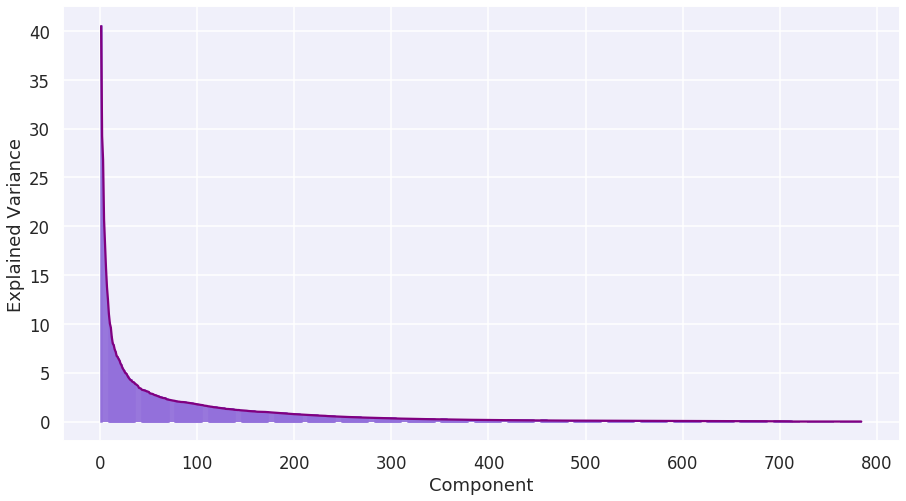

In [72]:
d = [i for i in range(1,785)]
# x=['EV %s' %i for i in range(1, len(var_exp))] #Create the x ticks labels for the plot

# #Choose the first y eigenvalues:
# x = x[0:component_POV]
# var_exp = var_exp[0:component_POV]
# cum_var_exp = cum_var_exp[0:component_POV]
# max_percentage = int(np.max(cum_var_exp)/10) #Calculate the max percentage to display (for the plot scaling)


# y_pos = np.arange(len(x)) #Obtain the number of elements in the plots
fig, ax = plt.subplots(1)
ax.plot(d, eigen_vals, color = 'purple') #Plot the cumulative variance
ax.bar(d, eigen_vals , color = 'mediumpurple', edgecolor = 'mediumpurple', align = 'center') #Graph the bar chart

# plt.xticks(y_pos, x, fontsize='large') #Plot the x ticks

# ax.yticks(fontsize = 'large')
# plt.ylabel('Percentage of Explained Variance', fontsize = 'large') #Plot the y label
# plt.xlabel('Number of Features', fontsize = 'large') #Plot the y label
ax.set_ylabel('Explained Variance')
ax.set_xlabel('Component')


# ax[1].plot(d, eigen_vals, color = 'purple') #Plot the cumulative variance
# ax[1].bar(d, eigen_vals , color = 'mediumpurple', edgecolor = 'mediumpurple', align = 'center' , log = True) #Graph the bar chart

# # plt.xticks(y_pos, x, fontsize='large') #Plot the x ticks

# # ax.yticks(fontsize = 'large')
# # plt.ylabel('Percentage of Explained Variance', fontsize = 'large') #Plot the y label
# # plt.xlabel('Number of Features', fontsize = 'large') #Plot the y label
# ax[1].set_ylabel('Explained Variance')
# ax[1].set_xlabel('Component')

# ax[1].set_title('Explained Variance per Eigenvalue',  y = -0.13) #Add a title to the graph
plt.show() #Display the graph

## Question 4 Consider the attached file dataset3.txt. The first two columns of the data file show the feature of each sample and the last column illustrates its corresponding binary level.

### a. What is the cost function in logistic regression?

### b Estimate the parameters using stochastic gradient descent (SGD) method. You need to implement the SGD function for the optimization.

In [0]:
import matplotlib as mplab  #Change document format
import matplotlib.pyplot as plt #to plot
from matplotlib.patches import Ellipse  # to plot contour
from matplotlib.colors import ListedColormap  # To change colors of plots
from matplotlib.patches import Patch  # To modify legend
# from matplotlib.mlab import bivariate_normal

import numpy as np  #To hanlde arrays and do math
import pandas as pd #To use DataFrames

#Import numpy's linear algebra functions (used to modify the normal distributions according to cov matrix and to get the eigenvalues,eigenvectors)
from numpy import linalg as LA  

import seaborn as sns # Plot heatmap

import gzip #open dataset question 3
import urllib  # To download dataset from url

from sklearn.preprocessing import StandardScaler # To standardize the samples

from scipy.special import expit # 1/1-e^(-cositas)

## https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
## from small to large (seaborn-notebook, seaborn-talk, seaborn-poster)
sns.set_style("darkgrid", {"axes.facecolor": '#f0f0fa'})
sns.set_context("talk")
# plt.style.use('seaborn-talk')

#f5f5ff

mplab.rcParams['figure.figsize'] = [15,8]


In [74]:
## Cambiando orden de b, dw1, dw2

# With minmax scaler

data4 = pd.read_csv('dataset3.txt', header=None)
data4.columns = ["f1", "f2", "class"]


data4_shuffle = data4.values

# Randomly shuffle the rows of the dataset
np.random.shuffle(data4_shuffle)

# Scaling the dataset can reduce convergence time
data4_min = np.amin(data4_shuffle[:, 0:2], axis = 0)
data4_max = np.amax(data4_shuffle[:, 0:2], axis = 0)

# Return a new array of given shape and type, filled with fill_value.
data4_scaled = np.full(data4_shuffle.shape, 42.0)
data4_scaled[:, 0:2] = (data4_shuffle[:, 0:2]-data4_min.T)/(data4_max.T- data4_min.T)
data4_scaled[:,2] = data4_shuffle[:,2]
  

epochs = 1500
# J is the cost function
J = 0.0
# deltas
dw1 = 0.5
dw2 = 0.5
db = 0.5
learnRate = 0.1
s = 0.00001

J_Epoch = np.zeros(epochs)

coeffs = np.full(3, 5.0) #w1, w2, b

for k in range(epochs):
  if k % 100 == 0:
    learnRate = learnRate/2 # Reduce the learn rate depending on the number of epochs
  for i in range(data4.shape[0]):
    z = coeffs[0:2].T @ data4_scaled[i, 0:2] + coeffs[2]
    a = expit(z)
    y = data4_scaled[i, 2]
    J = J - (y * np.log(a + s) + (1 - y) * np.log(1 - a + s))

    dz = a - y
    dw1 = data4_scaled[i, 0] * dz
    dw2 = data4_scaled[i, 1] * dz
    db = dz

    coeffs[0] = coeffs[0] - learnRate * dw1
    coeffs[1] = coeffs[1] - learnRate * dw2
    coeffs[2] = coeffs[2] - learnRate * db
  J = J/data4_scaled.shape[0]
  J_Epoch[k] = J

print('The parameters for the SGD are: theta1 = {0:.2f}, theta2 = {1:.2f}, and b = {2:.2f}'.format(coeffs[0], coeffs[1], coeffs[2]))

The parameters for the SGD are: theta1 = 9.51, theta2 = 8.93, and b = -8.34


### c. Plot the cost function along the epochs of the SGD.

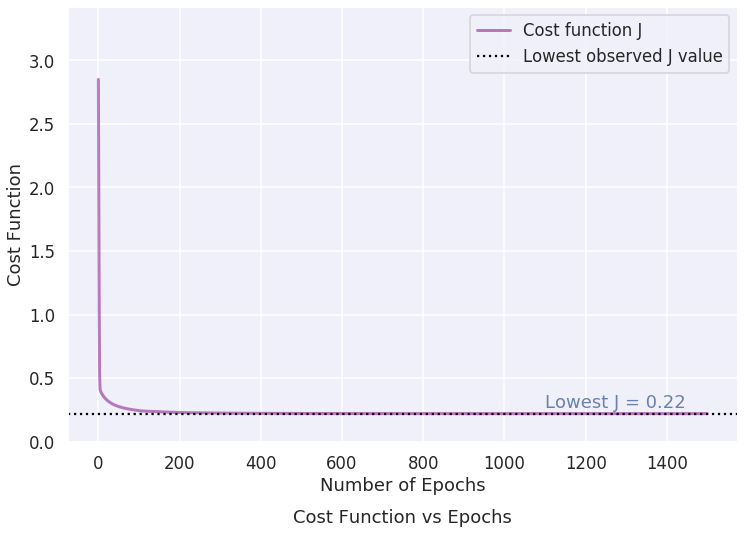

In [75]:
fig, ax = plt.subplots(1, 1, figsize = [12.0, 8.0])

lowestJ_idx = np.argmin(J_Epoch)
ax.plot(J_Epoch, color = "purple", label = "Cost function J", alpha = 0.5, linewidth = 3)
ax.set_ylim(0, 1.2 * max(J_Epoch))
# ax.axvline(lowestJ_idx, alpha = 0.2, color = 'red')
ax.axhline(J_Epoch[lowestJ_idx],linestyle = ':', alpha = 1, color = 'black', label= "Lowest observed J value")

ax.text(x = 1100, y = (J_Epoch[lowestJ_idx])*1.2, s = "Lowest J = {0:.2f}".format(J_Epoch[lowestJ_idx]), alpha = 0.7, color = '#334f8d')

# ax.text(x = lowestJ_idx - 0.05 * epochs, y = max(J_Epoch)/2, s = "Lowest J = {0:.2f}".format(J_Epoch[lowestJ_idx]), rotation = 90, alpha = 0.7, color = '#334f8d')
ax.set_ylabel('Cost Function')
ax.set_xlabel('Number of Epochs')
ax.legend()
ax.set_title('Cost Function vs Epochs', y = -0.2)

plt.show()

### d. Use the learned model to classify all training samples and report the accuracy.

In [76]:
def logistic(Array, threshold = 0.5, prediction0 = 0, prediction1 = 1):
  prediction = np.full(Array.shape[0], 42)
  for i in range(prediction.shape[0]):
    z = coeffs[0:2].T @ Array[i] + coeffs[2]

    expit_result = expit(z)

    if expit_result > threshold:
      prediction[i] = prediction1
    else:
      prediction[i] = prediction0

  return prediction

# def logisticPredict(valuesArray, boundary = 0.5, prediction0 = 0, prediction1 = 1):
#   z = coeffs[0:2].T @ valuesArray + coeffs[2]
#   logisticRegression = expit(z)
#   if logisticRegression < boundary:
#     prediction = prediction0
#   else:
#     prediction = prediction1
#   return prediction

# Classification after training
log_reg_mat = np.full((data4.shape[0], 4), 42)

log_reg_mat[:,:3] = data4_shuffle[:,:3]
log_reg_mat[:,3] = logistic(data4_scaled[:, 0:2]) 

correct_pred = log_reg_mat[log_reg_mat[:, 2] == log_reg_mat[:, 3]]
log_reg_acc = (correct_pred.shape[0] / data4.shape[0]) * 100.0
print('The accuracy of the logistic regression model is {0:.2f}%'.format(log_reg_acc))

The accuracy of the logistic regression model is 89.00%


### e and f. Plot the data and show the class of the sample using different colors. Plot the decision boundary of the classifier

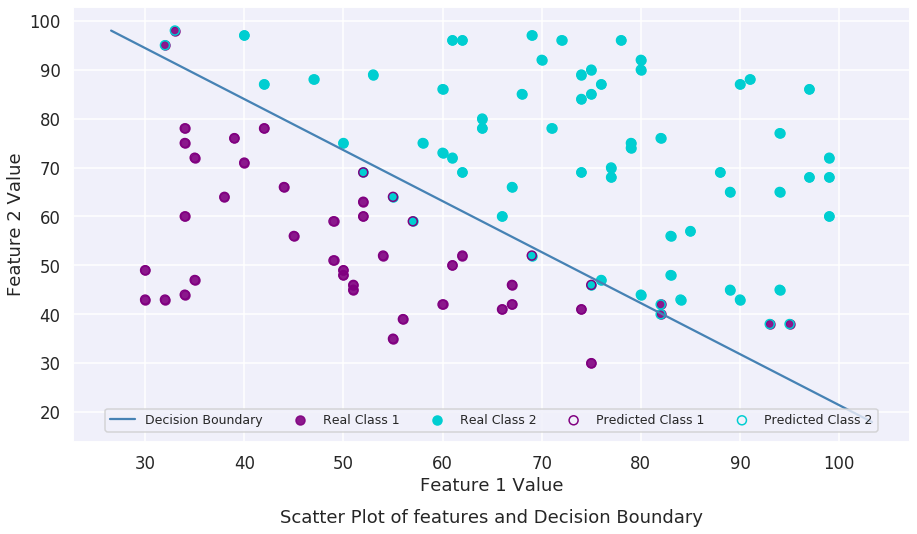

In [77]:
# Create the boundary line
x = np.linspace(np.amin(data4_scaled[:,0:2]) - 0.05 * np.amax(data4_scaled[:,0:2]), 1.05 *np.amax(data4_scaled[:,0:2]), 50)
y = np.full(x.shape, 42.0)



# for i in range(x.shape[0]):
#   y[i] = -(coeffs[2] + coeffs[0] * x[i]) / coeffs[1]

y = -(coeffs[2] + coeffs[0] * x) / coeffs[1]



x = x*(data4_max[0] - data4_min[0]) + data4_min[0]
y = y*(data4_max[1] - data4_min[1]) + data4_min[1]


# x2_vals[i] = -(coeffs[0] + coeffs[1] * x1_vals[i]) / coeffs[2]


# Get the real class values
real_class1 = log_reg_mat[log_reg_mat[:, 2] == 0]
real_class2 = log_reg_mat[log_reg_mat[:, 2] == 1]

# Get the predicted class values
pred_class1 = log_reg_mat[log_reg_mat[:, 3] == 0]
pred_class2 = log_reg_mat[log_reg_mat[:, 3] == 1]\


# Plot
colors = ['purple', 'darkturquoise']

fig, ax = plt.subplots(1, 1)
ax.scatter(real_class1[:, 0], real_class1[:, 1],  alpha = 0.9,
           label = "Real Class 1", color = colors[0],)
ax.scatter(real_class2[:, 0], real_class2[:, 1], 
           label = "Real Class 2", color = colors[1],)
ax.scatter(pred_class1[:, 0], pred_class1[:, 1], color = 'none', edgecolors = colors[0],
           label = "Predicted Class 1")
ax.scatter(pred_class2[:, 0], pred_class2[:, 1], color = 'none', edgecolors = colors[1],
           label = "Predicted Class 2")

ax.plot(x, y, color = 'steelblue', label = 'Decision Boundary')
ax.legend(loc = 'center', fontsize  = 'x-small', bbox_to_anchor = (0.5, 0.05), ncol = 5)
ax.set_ylabel('Feature 2 Value')
ax.set_xlabel('Feature 1 Value')
ax.set_title('Scatter Plot of features and Decision Boundary', y = -0.2)
plt.show()